# Naive Bayes Classifier  with Python and sklearn library
## Playing Tennis Example
## Classification of Diabetes

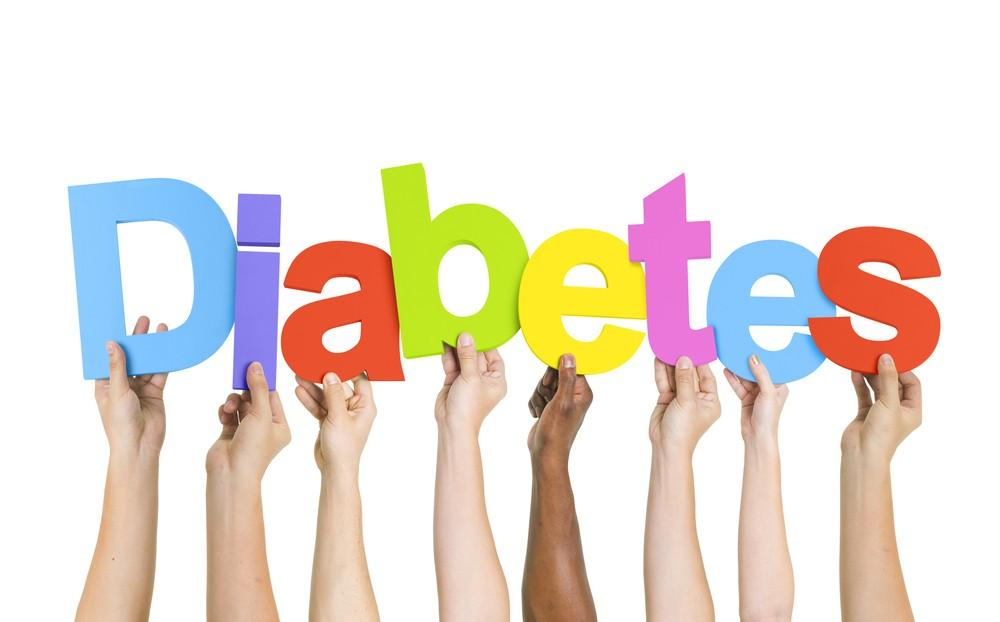

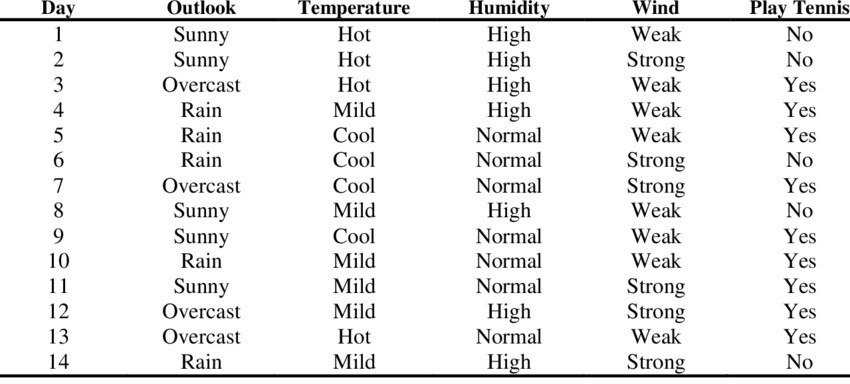

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB  # As continuous dataset is given 
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pylab as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#from sklearn.metrics import plot_confusion_matrix
函数plot_confusion_matrix在scikit-learn 1.0中已弃用，并将在1.2中删除。
#ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics'
#pip install --upgrade scikit-learn

#from sklearn.metrics import ConfusionMatrixDisplay


Types of Naive Bayes Classifiers:
1. Gaussian Naive Bayes:
Assumes that the continuous values associated with each class are distributed according to a Gaussian distribution.
2. Multinomial Naive Bayes:

Used for discrete data, often applied to document classification where the features are word frequencies.

3. Bernoulli Naive Bayes:

Suitable for binary feature data, where features are either present or absent.

# Playing Tennis Classification with Naive Bayes

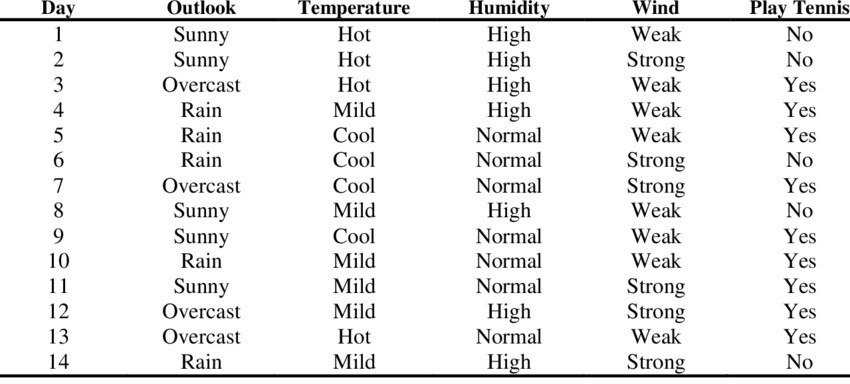

In [2]:
#load play_tennis.csv
data_train = pd.read_csv('play_tennis_train.csv')
data_test = pd.read_csv('play_tennis_test.csv')

In [3]:
data_train

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [4]:
data_test

,day,outlook,temp,humidity,wind,play
0,D11,Sunny,Mild,Normal,Strong,Yes
1,D12,Overcast,Mild,High,Strong,Yes
2,D13,Overcast,Hot,Normal,Weak,Yes
3,D14,Rain,Mild,High,Strong,No


In [5]:
#Encoding data from text into number
le = preprocessing.LabelEncoder()
data_train_df = pd.DataFrame(data_train)
data_train_df_encoded = data_train_df.apply(le.fit_transform)

data_test_df = pd.DataFrame(data_test)
data_test_df_encoded = data_test_df.apply(le.fit_transform)

In [6]:
data_train_df_encoded

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,2,2,1,0,0,0
2,3,0,1,0,1,1
3,4,1,2,0,1,1
4,5,1,0,1,1,1
5,6,1,0,1,0,0
6,7,0,0,1,0,1
7,8,2,2,0,1,0
8,9,2,0,1,1,1
9,1,1,2,1,1,1


In [7]:
#Splitting dataset into test and train variables
x_train = data_train_df_encoded.drop(['play'],axis=1)
y_train = data_train_df_encoded['play']

x_test = data_test_df_encoded.drop(['play'],axis=1)
y_test = data_test_df_encoded['play']

In [8]:
x_train

,day,outlook,temp,humidity,wind
0,0,2,1,0,1
1,2,2,1,0,0
2,3,0,1,0,1
3,4,1,2,0,1
4,5,1,0,1,1
5,6,1,0,1,0
6,7,0,0,1,0
7,8,2,2,0,1
8,9,2,0,1,1
9,1,1,2,1,1


In [9]:
y_train

0    0
1    0
2    1
3    1
4    1
5    0
6    1
7    0
8    1
9    1
Name: play, dtype: int32

In [10]:
#use GaussianNB model for prediction
model = GaussianNB()
nbtrain = model.fit(x_train, y_train)

y_pred = nbtrain.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [12]:
y_pred

array([0, 1, 1, 0])

In [11]:
y_test

0    1
1    1
2    1
3    0
Name: play, dtype: int32

In [13]:
cm=confusion_matrix(y_test, y_pred)

Confusion Matrix
[[1 0]
 [1 2]]


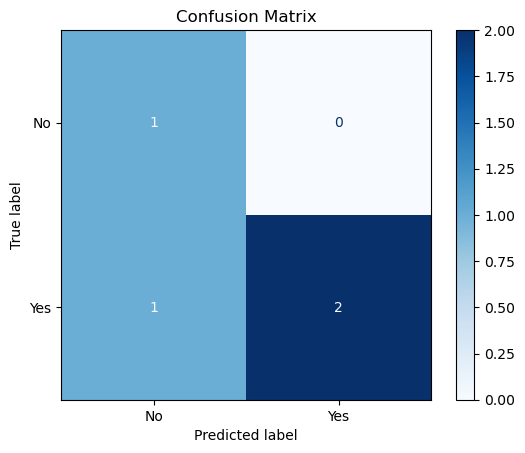

In [14]:
#Display confusion matrix results
# sklearn.metrics
# disp = plot_confusion_matrix(nbtrain, x_test, y_test,display_labels=['No','Yes'],cmap=plt.cm.Blues)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No','Yes'])
disp = ConfusionMatrixDisplay.from_estimator(nbtrain, x_test, y_test,display_labels=['No','Yes'],cmap=plt.cm.Blues)
#disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')

print('Confusion Matrix')
print(disp.confusion_matrix)

plt.show()
# confusion_matrix(y_test, y_pred, labels=[0, 1])

# Naive bayes Classifier on diabetes¶
Problem statement: To predict based on diagnostic measurements whether a patient has diabetes. >>> Classification problem

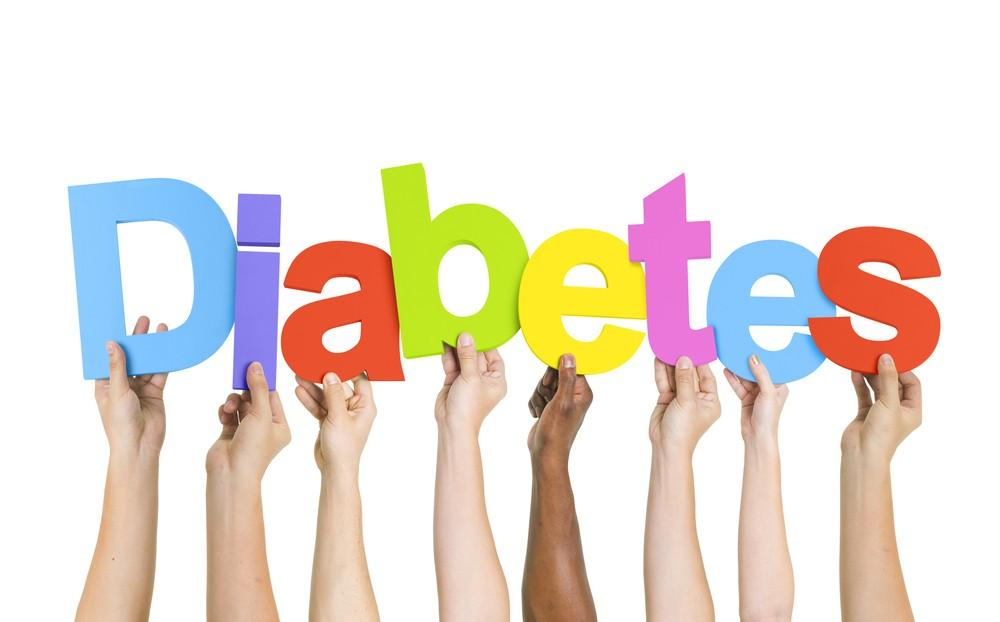

业务理解：该项目的目标是独立地诊断一个人是否患有糖尿病的可能性，因为结果不依赖于特征之间的组合关系，而是完全依赖于独立的值。因此，所有功能都独立地贡献结果。
医生将独立考虑这些特征来判断患者是否患有糖尿病并开药。
因此，我们将采用“朴素贝叶斯”算法。

In [15]:
# Reading data
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
特征信息
Pregnancies：怀孕次数
Glucose：口服葡萄糖耐量试验中 2 小时的血浆葡萄糖浓度
BloodPressure：舒张压（毫米汞柱）
SkinThickness：三头肌皮褶厚度（mm）
Insulin：2小时血清胰岛素（mu U/ml）>>胰岛素水平
BMI：身体质量指数（体重公斤/（身高米）^2）
DiabetesPedigreeFunction：糖尿病谱系函数
Age： 年龄（岁）
Outcome：类别变量（有疾病（1）或没有疾病（0））

# Basic Operations

In [16]:
df= data.copy()

In [17]:
df.shape

(768, 9)

In [18]:
# Columns of dataset

#df.columns
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
# Checking the duplicate Records

df.duplicated().sum()

0

In [20]:
# Checking the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
# Description of data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [22]:
zero_features = ['Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = df['Glucose'].count()

for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print('Number of cases of 0 in {0} is {1}, Percentage is {2:.2f} %'.format(feature, zero_count, zero_count*100/total_count))

Number of cases of 0 in Glucose is 5, Percentage is 0.65 %
Number of cases of 0 in BloodPressure is 35, Percentage is 4.56 %
Number of cases of 0 in SkinThickness is 227, Percentage is 29.56 %
Number of cases of 0 in Insulin is 374, Percentage is 48.70 %
Number of cases of 0 in BMI is 11, Percentage is 1.43 %


Report: There is no missing values in the dataset, but we cannot ignore the percentage of 0 values in Glucose, BloodPressure, SkinThickness, Insulin, BMI. In SkinThickness and Insulin especially percentage of 0 value is high. So we will replace 0 value with the mean.

In [23]:
df_mean = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, df_mean)

In [24]:
df_mean

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

Text(0.5, 1.0, 'Feature name : Pregnancies')

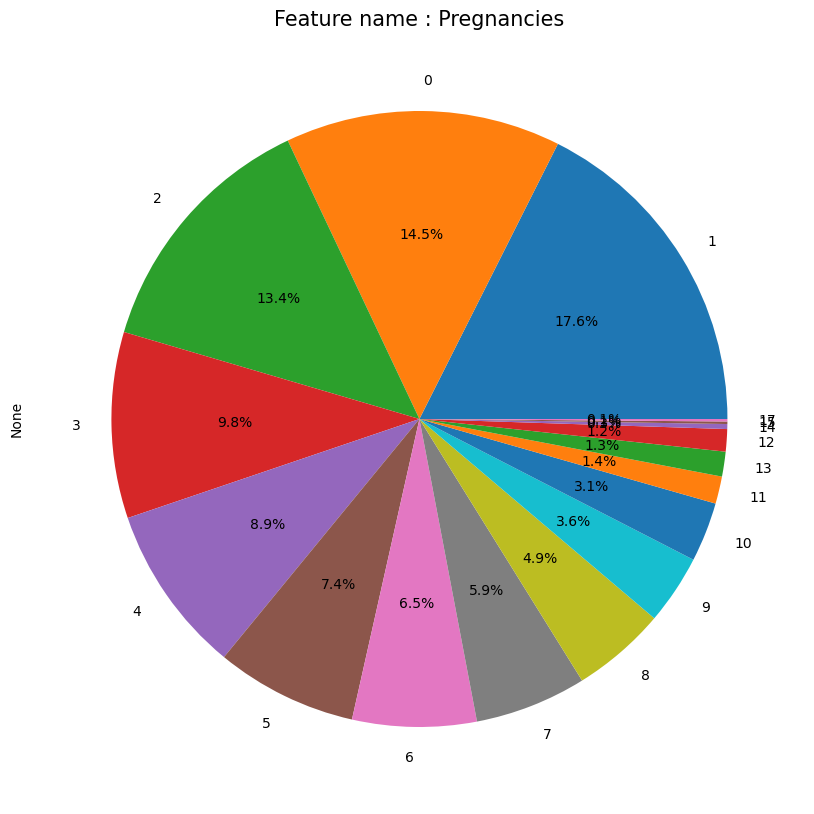

In [25]:
# Pie chart

plt.figure(figsize=(20,10))
df.value_counts('Pregnancies').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : Pregnancies", fontsize = 15)

<AxesSubplot:xlabel='Pregnancies'>

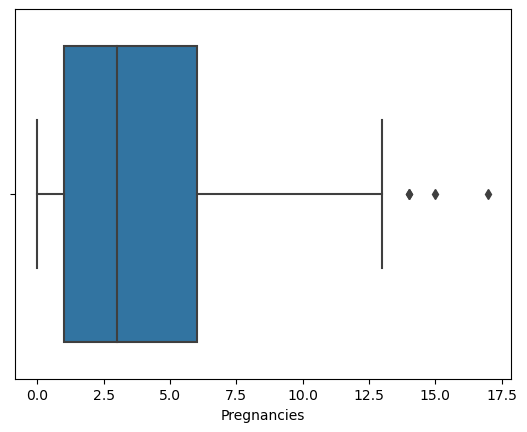

In [26]:
# Boxplot

sns.boxplot(df['Pregnancies'])

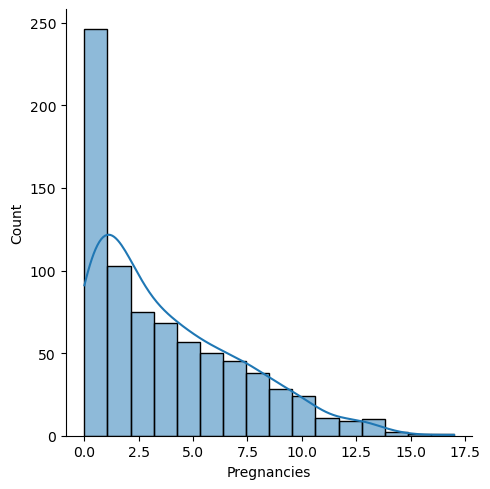

In [27]:
# distplot

sns.displot(x= df['Pregnancies'], kde=True)

<AxesSubplot:xlabel='Glucose'>

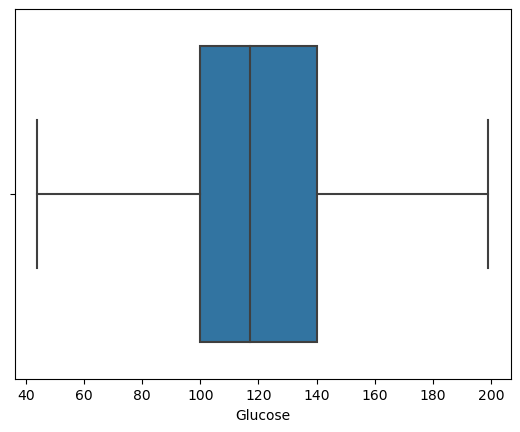

In [28]:
# Boxplot

sns.boxplot(df['Glucose'])

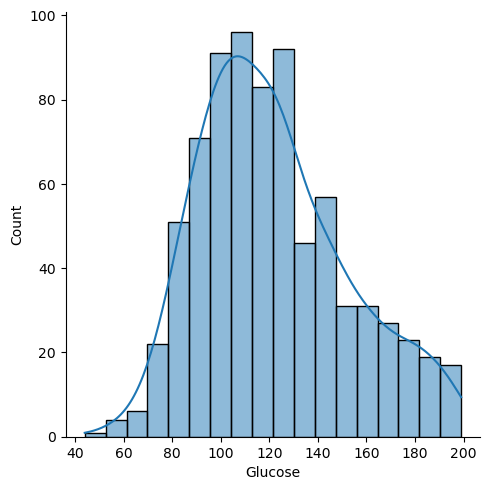

In [29]:

# distplot

sns.displot(x= df['Glucose'], kde=True)

Text(0.5, 1.0, 'Feature name : Insulin')

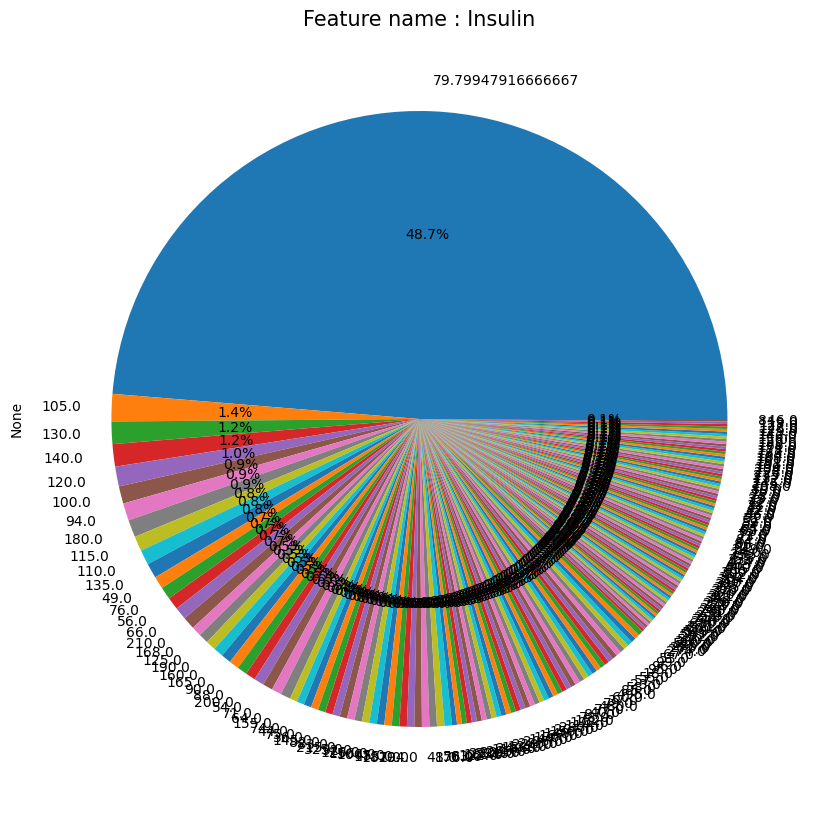

In [30]:
# Pie chart

plt.figure(figsize=(20,10))
df.value_counts('Insulin').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : Insulin", fontsize = 15)

<AxesSubplot:xlabel='Insulin'>

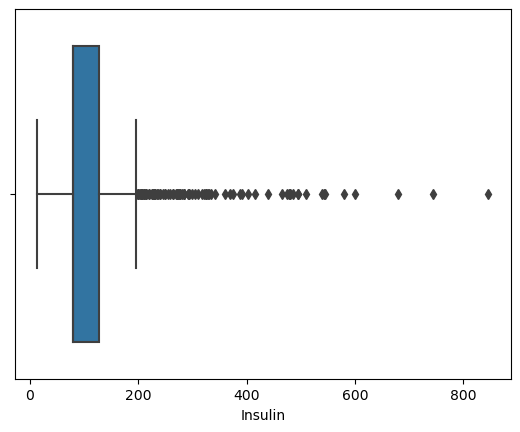

In [31]:
# Boxplot

sns.boxplot(df['Insulin'])

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

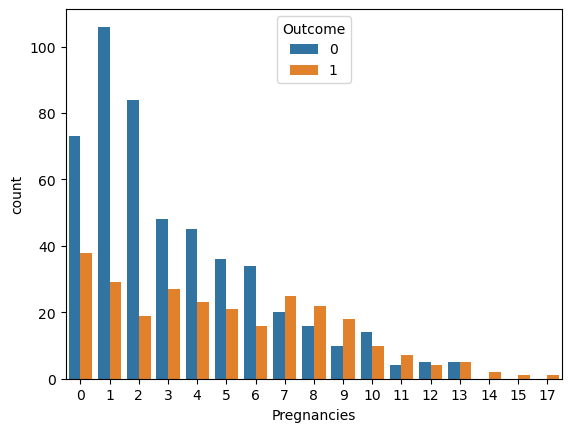

In [32]:
sns.countplot(data= df, x='Pregnancies', hue='Outcome')

<AxesSubplot:>

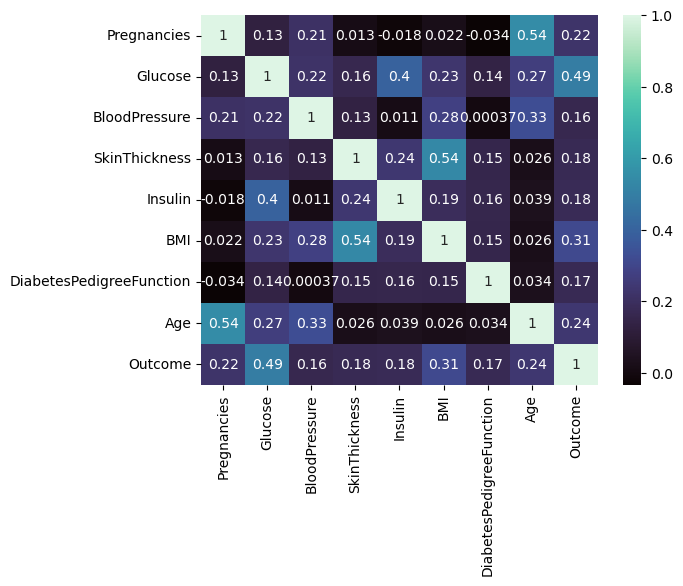

In [33]:
sns.heatmap(data=df.corr(), annot=True, cmap='mako')

In [34]:
x = df.drop(columns='Outcome')

In [35]:
y= df.Outcome

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

In [37]:
scaler = StandardScaler()

In [38]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
# 方差膨胀因子VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_test_scaled, i) for i in range(x_test_scaled.shape[1])]
vif['Features'] = x.columns

# Let's check the status
vif

,vif,Features
0,1.596899,Pregnancies
1,1.333371,Glucose
2,1.416792,BloodPressure
3,1.454128,SkinThickness
4,1.354222,Insulin
5,1.437099,BMI
6,1.043951,DiabetesPedigreeFunction
7,1.818681,Age


In [40]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train_scaled, y_train)

GaussianNB()

In [41]:
y_pred = naive_bayes.predict(x_test_scaled)

In [42]:
#from sklearn.metrics import accuracy_score
print(f'Training score of the model is : {round(naive_bayes.score(x_train_scaled, y_train),3)*100} %')
print(f'Accuracy Score of Naive Bayes model is : {round(accuracy_score(y_test, y_pred),4)*100} %')

Training score of the model is : 74.8 %
Accuracy Score of Naive Bayes model is : 77.08 %


In [43]:
#from sklearn.metrics import roc_auc_score

y_train_predict_roc = naive_bayes.predict_proba(x_train_scaled)
print("Naive Bayes model's training roc-auc score is : {}%".format(round(roc_auc_score(y_train, y_train_predict_roc[:,1])*100)))
y_test_predict_roc = naive_bayes.predict_proba(x_test_scaled)
print("Naive Bayes model's roc-auc accuracy score is : {}%".format(round(roc_auc_score(y_test, y_test_predict_roc[:,1])*100)))

Naive Bayes model's training roc-auc score is : 81%
Naive Bayes model's roc-auc accuracy score is : 82%


In [44]:
#from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[112,  18],
       [ 26,  36]], dtype=int64)

In [45]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive, '\nTrue Negative:',true_negative, '\nFalse Negative:',false_negative, '\nFalse Positive:',false_positive)

True Positive: 112 
True Negative: 36 
False Negative: 26 
False Positive: 18


In [46]:
# Calculating the Accuracy

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print(f'Accuracy of NaiveBayes model using confusion matrix is: {round(Accuracy,4)*100}%')

Accuracy of NaiveBayes model using confusion matrix is: 77.08%


In [47]:
# Calculating Precision 

precision = true_positive/(true_positive+false_positive)
print(f'Precision score of NaiveBayes model is: {round(precision,4)*100}%')

Precision score of NaiveBayes model is: 86.15%


In [48]:
# Calculating Recall 

recall = true_positive/(true_positive+false_negative)
print(f'Recall score of NaiveBayes model is: {round(recall,4)*100}%')

Recall score of NaiveBayes model is: 81.16%


In [49]:
# F1 score

F1_score = 2*(recall * precision)/(recall + precision)
print(f'F1_score score of NaiveBayes model is: {round(F1_score,4)*100}%')

F1_score score of NaiveBayes model is: 83.58%


In [50]:
from sklearn.metrics import classification_report

class_reprt_naive_bayes = classification_report(y_test, y_pred)
print(class_reprt_naive_bayes)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       130
           1       0.67      0.58      0.62        62

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.77       192



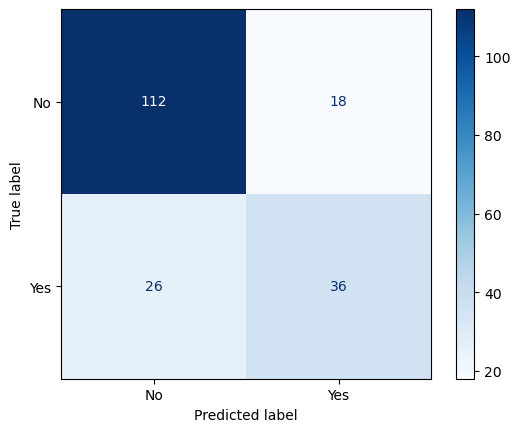

In [61]:
#from sklearn.metrics import plot_confusion_matrix

disp =ConfusionMatrixDisplay(conf_mat, display_labels=['No','Yes'])
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [62]:
auc = roc_auc_score(y_test, y_pred)
print(f'AUC score of NaiveBayes model is: {round(auc,4)*100}%')

AUC score of NaiveBayes model is: 72.11%


In [63]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

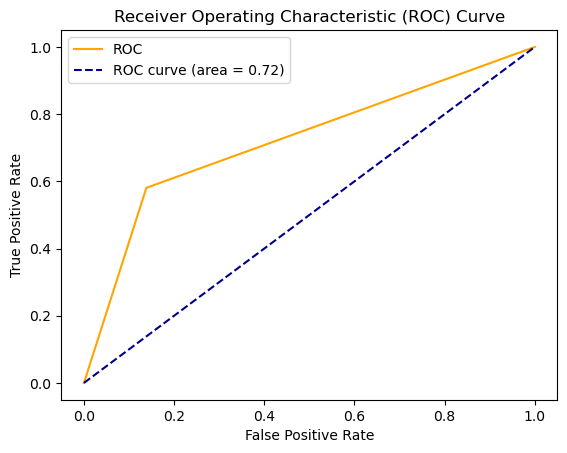

In [64]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()